# EDA - CHANEL - 3 datasets (Fashionphile, Amore, Rebag)

In [1]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
# this line is needed to display plots in jupyter notebooks
%matplotlib inline
import csv

## 1. Merging data

loading in the 3 data sets and performing some final edits to ensure datasets are uniform and can be merged

In [2]:
#reading in the rebag chanel dataset
dfRB = pd.read_csv('RBChanel_cleanpd.csv', index_col=0,header=0)
dfRB.head()

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
0,1865,1980s,mini,metallic,lambskin,0,good,0.0,0.0,0.0,0.0,1.0,clutch,Chanel
1,1080,1980s,small,black,fabric,0,fair,1.0,0.0,0.0,0.0,1.0,clutch,Chanel
2,1905,1980s,small,black,lambskin,1,good,0.0,0.0,1.0,0.0,0.0,clutch,Chanel
3,1650,1980s,mini,black,suede,0,good,0.0,0.0,1.0,1.0,0.0,clutch,Chanel
4,2030,1980s,xlarge,black,lambskin,2,good,1.0,0.0,0.0,0.0,1.0,clutch,Chanel


In [3]:
#reading in the amore chanel dataset
dfAM = pd.read_csv('AmoreChanel_clean_mergeready.csv', index_col=0,header=0)
dfAM.head()

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
index,,,,,,,,,,,,,,
0,2771,2000-2010,large,black,caviar,4,good,0,0,1,1,1,shoulder_bag,Chanel
1,3050,1980s,small,beige,lambskin,2,good,0,0,1,0,1,hand_bag,Chanel
3,911,1990s,small,black,lambskin,3,excellent,0,0,0,0,1,vanity_case,Chanel
5,2771,2000-2010,medium,black,caviar,1,used,0,1,1,0,1,shoulder_bag,Chanel
6,3236,2000-2010,small,black,lambskin,1,used,0,0,0,0,1,flap_bag,Chanel


In [23]:
#reading in the fashionphile chanel dataset
dfFP = pd.read_csv('FPChanel_cleanpd.csv', index_col=0,header=0)
dfFP.head()

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
0,2155,2015-2020,mini,blue,tweed,2,excellent,0.0,0.0,1.0,1.0,0.0,woc,Chanel
1,2395,2015-2020,mini,black,tweed,4,excellent,0.0,0.0,1.0,1.0,0.0,woc,Chanel
2,1295,2010-2015,mini,blue,caviar,2,good,0.0,0.0,1.0,0.0,0.0,woc,Chanel
3,2515,2015-2020,mini,red,caviar,3,like_new,0.0,0.0,1.0,1.0,1.0,woc,Chanel
4,1705,0,mini,red,caviar,0,good,1.0,0.0,1.0,1.0,1.0,woc,Chanel


In [24]:
# fixing FP uniformity issue identifief in EDA
def year_convert(row):
    if row.production_year == '0':
        return 'No year'
    else:
        return row.production_year

def mat_convert(row):
    if row.material == '0':
        return 'synthetic'
    else:
        return row.material 
        
dfFP['production_year'] = dfFP.apply(year_convert,axis='columns')
dfFP['material'] = dfFP.apply(mat_convert,axis='columns')

In [25]:
dfFP.groupby('production_year')['production_year'].count().sort_values(ascending=False)

production_year
2015-2020    456
2010-2015    318
No year      226
2000-2010    138
1990s         38
1980s         10
Name: production_year, dtype: int64

In [26]:
dfFP.head()

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
0,2155,2015-2020,mini,blue,tweed,2,excellent,0.0,0.0,1.0,1.0,0.0,woc,Chanel
1,2395,2015-2020,mini,black,tweed,4,excellent,0.0,0.0,1.0,1.0,0.0,woc,Chanel
2,1295,2010-2015,mini,blue,caviar,2,good,0.0,0.0,1.0,0.0,0.0,woc,Chanel
3,2515,2015-2020,mini,red,caviar,3,like_new,0.0,0.0,1.0,1.0,1.0,woc,Chanel
4,1705,No year,mini,red,caviar,0,good,1.0,0.0,1.0,1.0,1.0,woc,Chanel


In [31]:
df_all = pd.concat([dfAM, dfFP, dfRB], axis=0)

In [32]:
df_all.head(5)

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
0,2771,2000-2010,large,black,caviar,4,good,0.0,0.0,1.0,1.0,1.0,shoulder_bag,Chanel
1,3050,1980s,small,beige,lambskin,2,good,0.0,0.0,1.0,0.0,1.0,hand_bag,Chanel
3,911,1990s,small,black,lambskin,3,excellent,0.0,0.0,0.0,0.0,1.0,vanity_case,Chanel
5,2771,2000-2010,medium,black,caviar,1,used,0.0,1.0,1.0,0.0,1.0,shoulder_bag,Chanel
6,3236,2000-2010,small,black,lambskin,1,used,0.0,0.0,0.0,0.0,1.0,flap_bag,Chanel


In [33]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 0 to 989
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3926 non-null   int64  
 1   production_year  3926 non-null   object 
 2   size             3926 non-null   object 
 3   color            3926 non-null   object 
 4   material         3926 non-null   object 
 5   acc_included     3926 non-null   int64  
 6   condition_ext    3926 non-null   object 
 7   other_defects    3926 non-null   float64
 8   has_smell        3926 non-null   float64
 9   has_chain        3926 non-null   float64
 10  has_logo         3926 non-null   float64
 11  has_quilts       3926 non-null   float64
 12  bag_style        3926 non-null   object 
 13  brand            3926 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 460.1+ KB


In [35]:
# putting the merged & clean data in a new csv file
df_all.to_csv('CHANEL_clean_mergedALLdata.csv')

In [40]:
df_RBFP = pd.concat([dfFP, dfRB], axis=0)
# putting the merged & clean data in a new csv file
df_RBFP.to_csv('CHANEL_FPRBonly_merged.csv')

## 2. EDA - merged data

In [160]:
df = pd.read_csv('CHANEL_clean_mergedALLdata.csv', index_col=0,header=0)
df.head()

,price,production_year,size,color,material,acc_included,condition_ext,other_defects,has_smell,has_chain,has_logo,has_quilts,bag_style,brand
0,2771,2000-2010,large,black,caviar,4,good,0.0,0.0,1.0,1.0,1.0,shoulder_bag,Chanel
1,3050,1980s,small,beige,lambskin,2,good,0.0,0.0,1.0,0.0,1.0,hand_bag,Chanel
3,911,1990s,small,black,lambskin,3,excellent,0.0,0.0,0.0,0.0,1.0,vanity_case,Chanel
5,2771,2000-2010,medium,black,caviar,1,used,0.0,1.0,1.0,0.0,1.0,shoulder_bag,Chanel
6,3236,2000-2010,small,black,lambskin,1,used,0.0,0.0,0.0,0.0,1.0,flap_bag,Chanel


### 2.1 Distributions merged data

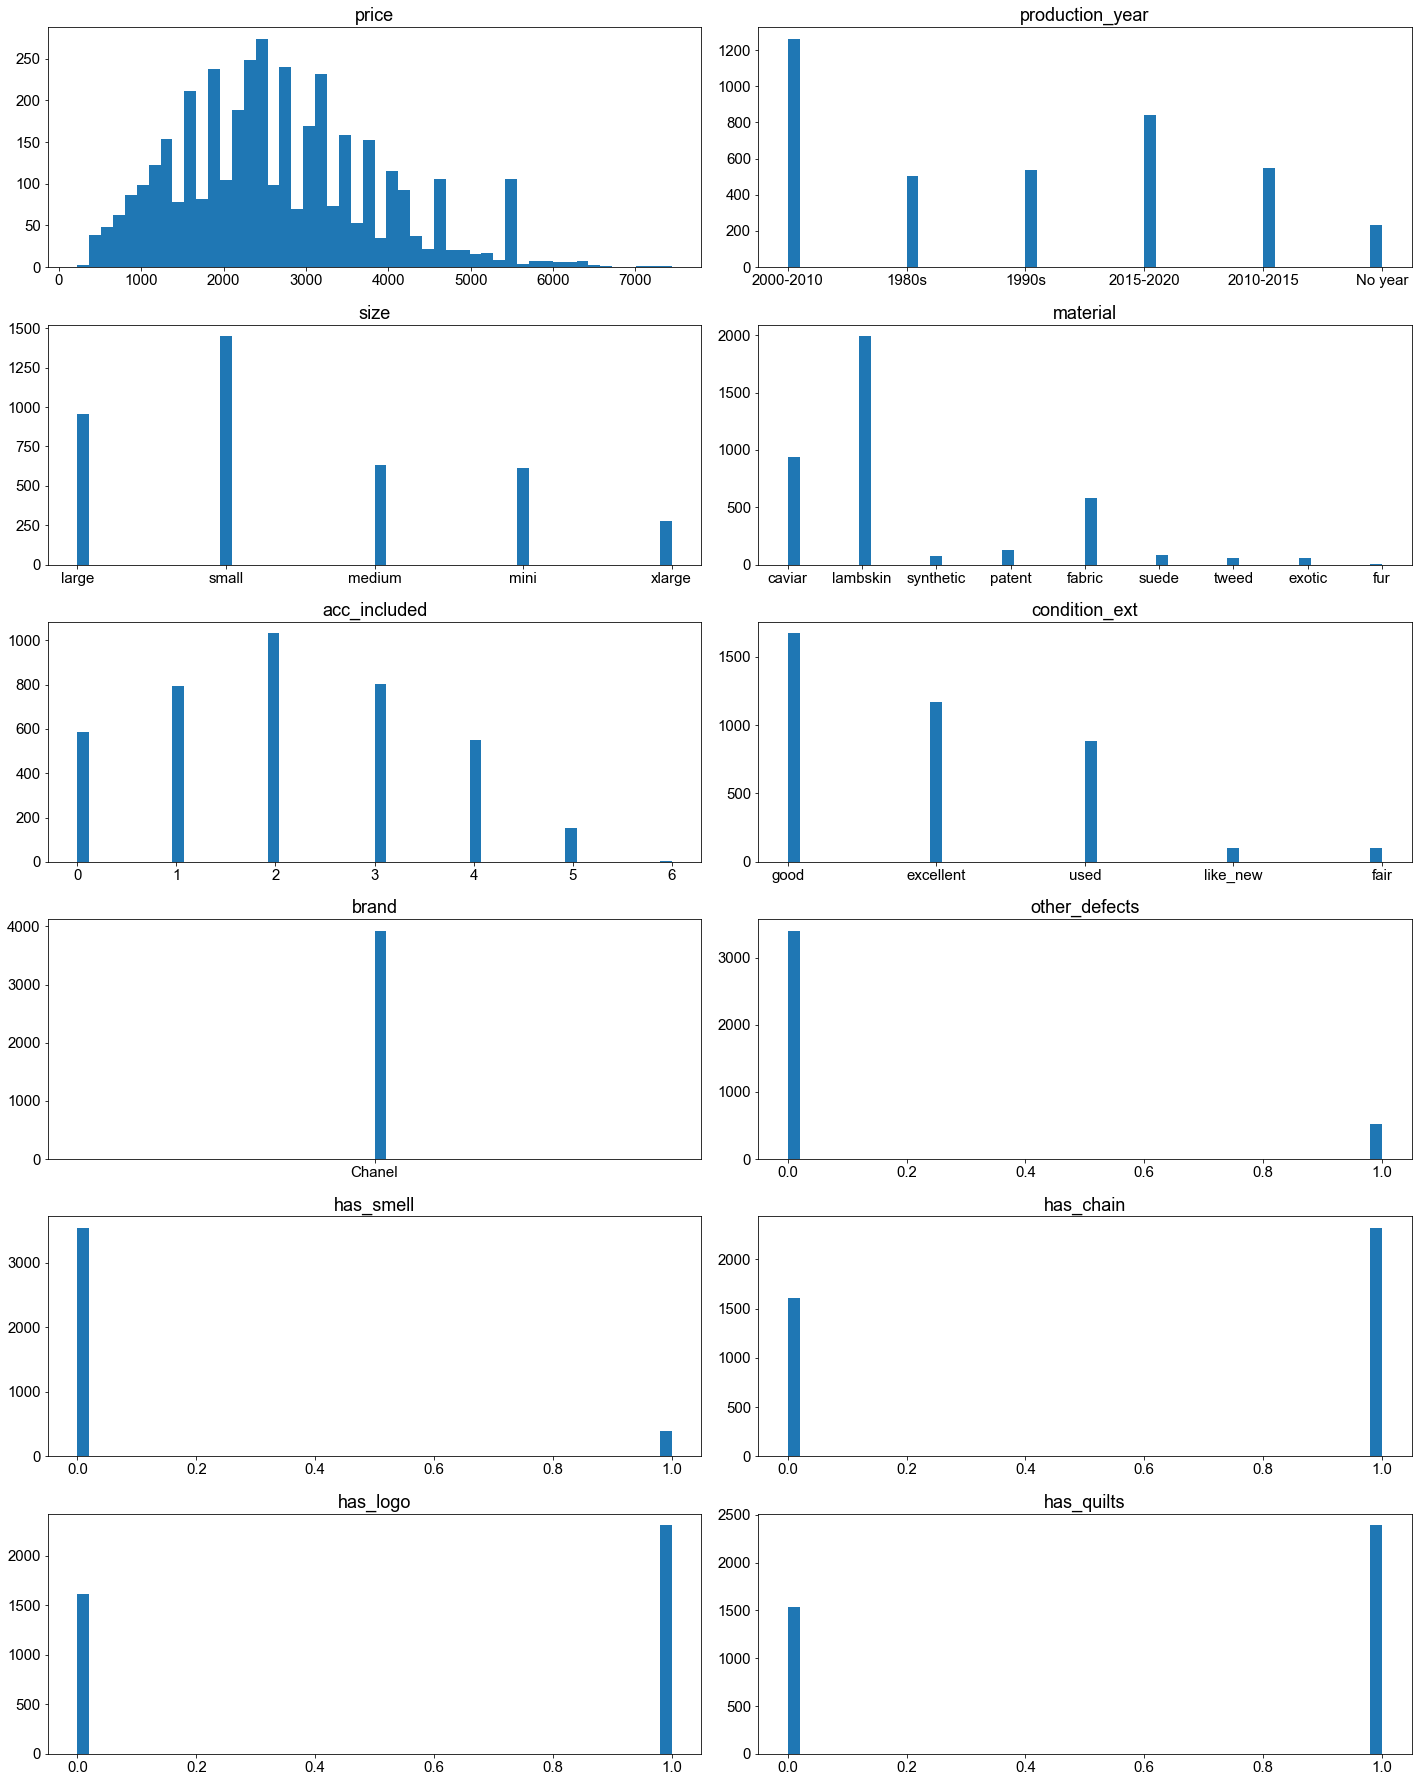

In [37]:
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size']=15

#look at the distribution of the variables
cols = ['price', 'production_year', 'size', 'material', 'acc_included',
       'condition_ext', 'brand', 'other_defects', 'has_smell',
       'has_chain', 'has_logo', 'has_quilts']

fig, axes = plt.subplots(6,2, figsize=(20,25))

for i in range(12):
    ax = axes[i//2][i%2]
    ax.hist(df[cols[i]],bins=50)
    ax.set_title(cols[i])

plt.tight_layout()

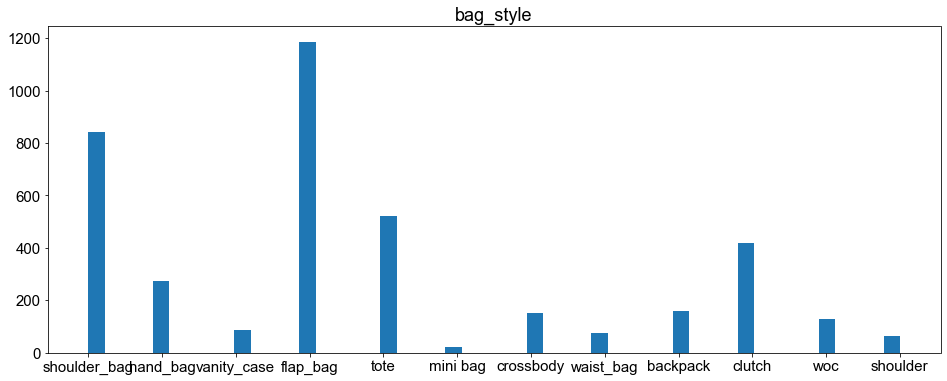

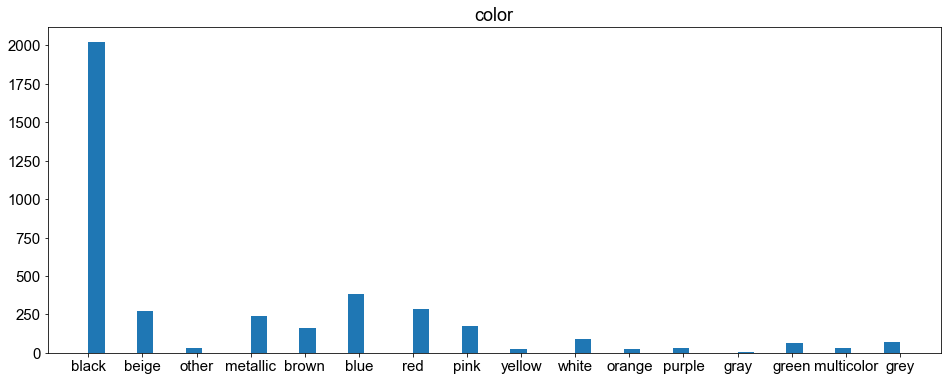

In [38]:
fig = plt.figure(figsize=(16, 6))
x = df['bag_style']
plt.title('bag_style')
_ = plt.hist(x, bins=50)   
    
fig = plt.figure(figsize=(16, 6))
x = df['color']
plt.title('color')
n = plt.hist(x, bins=50)

### 2.2 relationship between target *price* and features merged data (ALL)

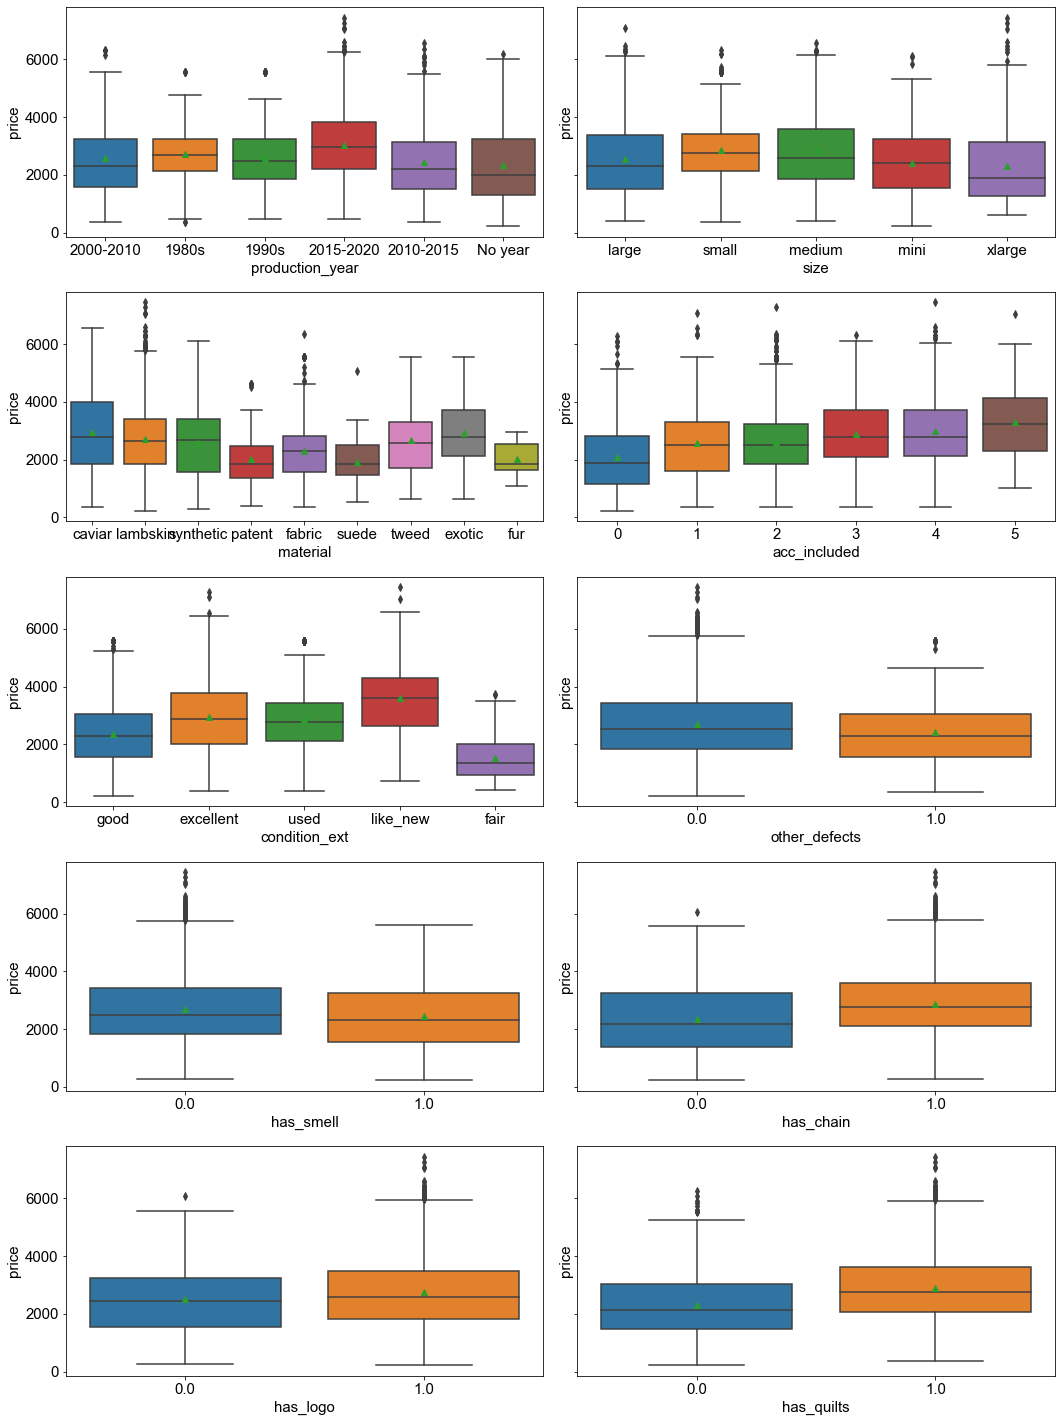

In [39]:
df=df.loc[(df.acc_included<6)]

fig, axes = plt.subplots(5,2, figsize=(15,20), sharey=True)
for xcol, ax in zip(['production_year', 'size', 'material', 'acc_included',
                     'condition_ext', 'other_defects', 'has_smell',
                     'has_chain', 'has_logo', 'has_quilts'], axes.flatten()):
    sns.boxplot(xcol, 'price', data=df, ax=ax,showmeans=True)       
plt.tight_layout()

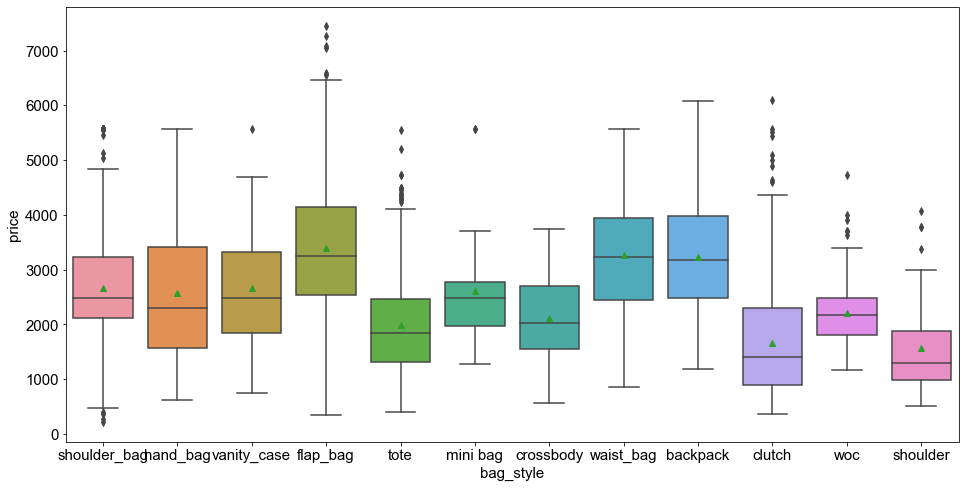

In [44]:
fig = plt.figure(figsize=(16, 8))
sns.boxplot('bag_style', 'price', data=df,showmeans=True)

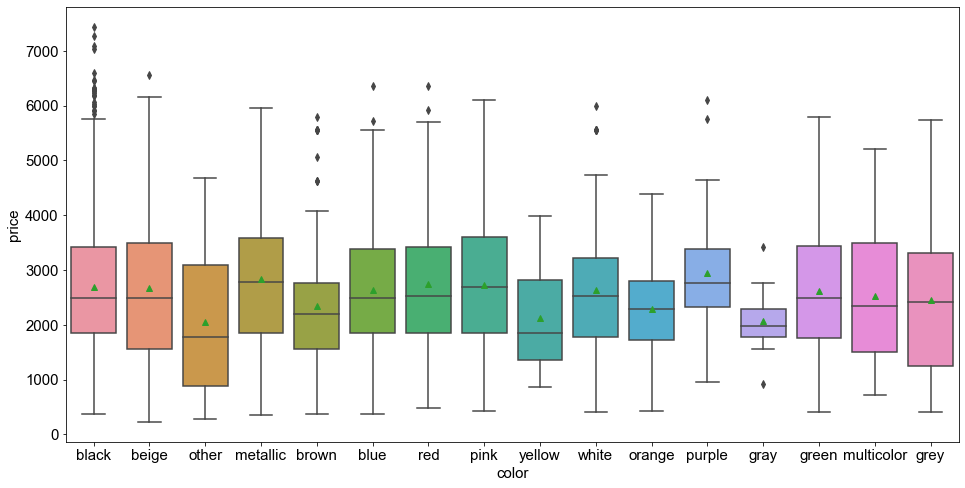

In [45]:
fig = plt.figure(figsize=(16, 8))
sns.boxplot('color', 'price', data=df,showmeans=True)